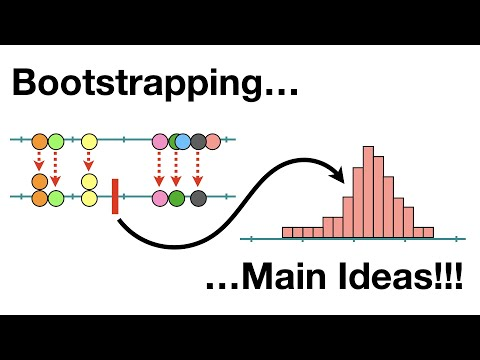

In [6]:
#1

from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

#1

The difference between "standard error of the mean" and "standard deviation" of the original data is: standard error of the mean refers to the how much the sample mean is exprected to vary from the mean of the original dataset, while standard deviation is the amount of variation of the individual data points from the mean.

#2

To calculate the 95% confidence interval: Calculate the sample mean and understand the standard error of the mean (how much the mean is expected to vary from population mean), Create a range of that covers 95% of the sample mean, then calculate the confidence interval (sample mean +- 1.96*standard error).

#3

Once the bootstrap mean has been determined, np.quantile can be used to calculate the 2.5 and 97.5 percentiles. The range between these 2 values would be the 95% confidence interval.

ChatGPT Session Link: https://chatgpt.com/share/66fc8511-968c-8010-a2f3-4d7d230b0d6f

Here's a summary of our conversation:

In our conversation, we covered several statistical concepts related to confidence intervals, particularly focusing on the standard error of the mean (SEM) and bootstrapping.

Standard Error of the Mean (SEM) vs. Standard Deviation (SD):

The standard deviation (SD) measures the spread of individual data points around the mean, while the SEM measures the variability of the sample mean as an estimate of the population mean.
The SEM decreases with larger sample sizes and can be used to construct a confidence interval around the sample mean.
Creating a 95% Confidence Interval Using SEM:

To create a 95% confidence interval for the mean using SEM, we use the formula:
CI = Sample Mean ± 1.96 × SEM

The interval covers the range where 95% of the potential sample means would fall if we were to resample from the population repeatedly.
Bootstrapped 95% Confidence Interval (without SEM):

Using the percentile method, we can create a bootstrapped confidence interval directly from the distribution of bootstrapped means.
After generating multiple bootstrapped sample means, we sort them and calculate the 2.5th percentile and 97.5th percentile using np.quantile() in Python to form the 95% confidence interval.
Example of Bootstrapping with np.quantile():

We demonstrated how to perform bootstrapping by resampling the data with replacement, calculating the means of each resample, and then using np.quantile() to find the desired percentiles to create the 95% confidence interval.
This discussion clarified the difference between SEM-based and bootstrapped confidence intervals and showed how to calculate both in practice.

In [29]:
#4
import numpy as np

def bootstrap_ci(sample, num_bootstrap=10000, confidence_level=0.95):
    # Generate bootstrap samples and calculate their means
    bootstrap_means = []
    for _ in range(num_bootstrap):
        bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample)) 
        #if you wanted to produce a con fidence interval for 
        #a different parameter such as population median, you would just us np.median instead  
    
    # Calculate the lower and upper percentiles for the confidence interval
    alpha = 1 - confidence_level
    lower_bound = np.percentile(bootstrap_means, 100 * alpha / 2)
    upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Example usage
sample = [12, 15, 14, 10, 13, 11, 14, 15, 13, 12]
lower, upper = bootstrap_ci(sample)
print(f"95% Bootstrap Confidence Interval: ({lower}, {upper})")

95% Bootstrap Confidence Interval: (11.9, 13.9)


#5

it is important to distinguish between the role of the population parameter and the sample statistic when it comes to confidence intervals because sample statistic is based on the data that you currently have, while population parameter is the unknown value that you are trying to estimate.

#6

1. First, collect the samples, then generate multiple samples by resampling with replacement (one observation can appear multiple times), then calculate the statistic you are interested in (mean, median, etc), repeat the resampling process a large number of times, estimate the confidence interval, then reflect on and interpret your results.

2. The purpose is to estimate the sampling distribution of a parameter when the main sample distribution data is unknown. This allows for the inference about the parameter in relation to the whole population. 

3. To asses whether the hypothesized guess might be plausable, you would collect a sample from the population (has ots own mean) as a point of estimation for the population mean, then you would resample and calculate the sample means. After plotting them, the variation of sample means would represent the variability of the sample mean based on the population sample. If the actual population falls wihtin the confidence interval then it is a plausible population mean based on your sample. If it is putside the confidence interval, then it is not a plausible mean.

#7

Failing to reject the null hypothesis when the confidence interval includes 0, is due to uncertainty of sample estimation; there is not enough evidence to claim that the population mean is not zero. However, to reject the null hypothesis, the confidence interval must exclude 0, indicating that the population mean is probably not 0.

link to ChatGPT Session: https://chatgpt.com/share/66ff2364-e104-8010-9500-c7084043df6b

Here’s a summary of our recent conversation:

You asked about how to use bootstrapping to assess whether a hypothesized guess about the population mean might be plausible, given a sample from that population. I explained that the process involves:
Formulating the hypothesized population mean (𝜇).
Taking a sample of size 𝑛.
Generating many bootstrapped samples by resampling with replacement from your observed sample.
Constructing a bootstrap distribution of sample means.
Assessing whether the hypothesized mean falls within a plausible range of the bootstrap distribution.
This approach helps assess how compatible the hypothesized mean is with the observed data.

#8

Problem Introduction:

A null hypothesis of no effect would mean that the difference between the final health score and the initial health score would be zero, or negliable.

The code generates plots all the original differences and provides a mean value for the data.

Mean health score change: 3.3


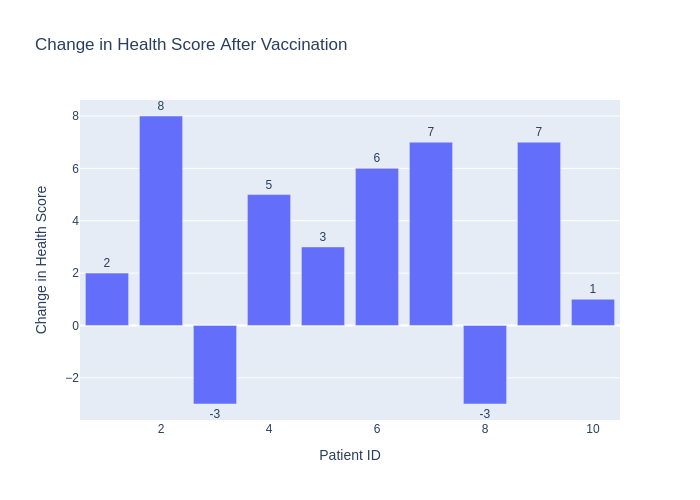

In [32]:
import pandas as pd
import plotly.express as px

# Sample data (replace this with loading your actual CSV file)
data = pd.read_csv('data.csv')

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the change in health score
df['ChangeInHealthScore'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Create the bar plot
fig = px.bar(df, 
              x='PatientID', 
              y='ChangeInHealthScore', 
              title='Change in Health Score After Vaccination',
              labels={'ChangeInHealthScore': 'Change in Health Score'},
              text='ChangeInHealthScore')

# Show the change values on the bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Update layout for better readability
fig.update_layout(yaxis=dict(title='Change in Health Score', zeroline=True),
                  xaxis=dict(title='Patient ID'))

mean_value = df['ChangeInHealthScore'].mean() #calculates the mean of the original dataset
print("Mean health score change:", mean_value)

# Show the plot
fig.show(renderer="png")

Quantitative Analysis:

This code generated 1000 bootstrapped datasets and adds all the means to a histogram in order to visualize the sampling distribution of the mean. The code also calculates the 95% confidence interval of the bootstrap samples.

95% Confidence Interval: (0.4177833188707214, 6.182216681129278)


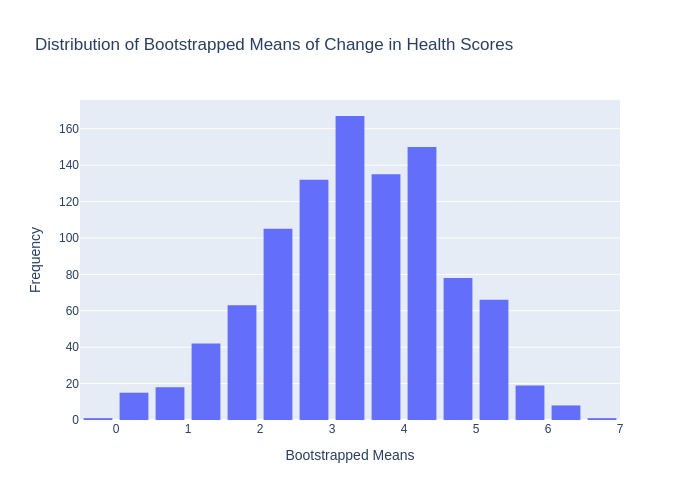

In [30]:

# Function to create bootstrapped means
import numpy as np
from scipy import stats
import plotly.express as px

np.random.seed(42)

def bootstrap_means(data, num_samples=1000):
    means = []
    for _ in range(num_samples):
        sample = data.sample(n=len(data), replace=True)  # Bootstrap sample
        means.append(sample['ChangeInHealthScore'].mean())
    return means

# Generate bootstrapped means
bootstrapped_means = bootstrap_means(df, num_samples=1000)

# Create a histogram of the bootstrapped means
fig = px.histogram(
    x=bootstrapped_means,
    title='Distribution of Bootstrapped Means of Change in Health Scores',
    labels={'x': 'Bootstrapped Means'},
    nbins=30
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Bootstrapped Means',
    yaxis_title='Frequency',
    bargap=0.2,
)

# Calculate the mean and standard deviation
mean_value = df['ChangeInHealthScore'].mean()
std_dev = df['ChangeInHealthScore'].std(ddof=1)  # Sample standard deviation
n = len(df)  # Sample size

# Calculate the standard error of the mean (SEM)
sem = std_dev / np.sqrt(n)

# Get the critical t-value for 95% confidence
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha / 2, df=n-1)

# Calculate the margin of error
margin_of_error = t_critical * sem

# Calculate the confidence interval
confidence_interval = (mean_value - margin_of_error, mean_value + margin_of_error)

# Print the confidence interval
print("95% Confidence Interval:", confidence_interval)

# Show the plot
fig.show(renderer="png")

Findings and Discussions:

Since the 95% confidence interval doesn't cover zero, we can reject the null hypothesis that the drug does not improve the health of the patients

considerations: If the original samples were biased towards having or not having an effect, this could have also affected the bootstrap samples, high variability in health scores could also indicate ineffectiveness.  

Link to ChatGPT Session: https://chatgpt.com/share/66ff2d26-9cb0-8010-8793-8213ed82f462

Here's a summary of our conversation regarding your Vaccine Data Analysis Assignment:

Data Visualization:

You requested code to visualize the change in health scores using Plotly, excluding comparisons by gender or age. I provided code to create a bar plot showing the change in health scores for each patient.
Bootstrapping Means and Histogram:

You asked for code to generate bootstrapped datasets and create a histogram of the means. I provided code that generates bootstrap samples, calculates the means of the change in health scores, and creates a histogram using Plotly.
Mean Calculation:

You requested code to calculate and print the mean of the ChangeInHealthScore. I provided a snippet to calculate the mean and print it.
95% Confidence Interval:

You asked for code to calculate the 95% confidence interval for the mean change in health scores. I provided a code example that computes the mean, standard deviation, standard error, critical t-value, margin of error, and the confidence interval.
Further Considerations for Bootstrap Sampling:

We discussed important considerations for using bootstrap sampling to test the null hypothesis of "no effect," including sample size, number of bootstrap samples, bias, variability, and methods for calculating confidence intervals.
Variation in the Context of the Analysis:

You inquired about what variation refers to in this case. I explained that variation can refer to individual and population differences in health scores, sampling variation, variation in bootstrapped estimates, effect size variation, and inter-observer variation. I highlighted the importance of understanding variation in the context of your analysis to draw valid conclusions about the vaccine's effectiveness.

#9 

Mostly